In [1]:
from pynwb import NWBHDF5IO; # to read/write
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy import stats;
from tqdm import tqdm;

In [41]:
def getSDF(spkTrain,FS=1000,AllorMean=1):
    """
    FS: sampling rate 
    AllorMean = 1 to get SDFs for all trials
    AllorMean = 0 to get the averaged SDF across all trials
    """
    # Make gaussian kernel window
    sigma = 5;
    t = np.arange(-3*sigma,3*sigma+1);
    y = (1/sigma*np.sqrt(np.pi*2)) * np.exp(-(t**2)/(2*sigma**2));
    window = y[:];
    window = window/np.sum(window);
    # convolution
    sdf = np.zeros(np.shape(spkTrain));
    for i in np.arange(np.shape(spkTrain)[0]):
        convspike = np.convolve(spkTrain[i,:],window);
        pStart = int(np.floor(len(window)/2));
        pEnd = int(np.floor(len(window)/2)+np.shape(spkTrain)[1]);
        convspike = convspike[pStart:pEnd];
 
        convspike[:pStart] = convspike[pStart];
        convspike[-pStart:] = convspike[-pStart];
        sdf[i,:] = convspike;
    sdf = sdf*FS;
    if AllorMean==0:
        sdf = np.mean(sdf,axis=0);
 
    return sdf;

In [50]:
data_dir = 'E:\\File\\Work\\2024\\Practice_recording_data\\'
nwb_filename = data_dir + 'Link_V4-PFC_cooling.nwb'
with NWBHDF5IO(nwb_filename, 'r') as io:
   nwbfile = io.read();
   units = nwbfile.units.to_dataframe();
   trials = nwbfile.trials.to_dataframe();

In [51]:
units.shape

(3505, 11)

In [42]:
units.iloc[0]

session                                               session_00
sess_name                                                l220428
hemisphere                                                    LH
probe                                                     probe0
unitID                                                        14
location                                                      V4
depth                                                       1220
avgWF          [-15.242637362637362, -15.315824175824176, -15...
normWF         [0.0031234957642238986, 0.0031234957642238986,...
spike_times    [18.179833333333335, 25.1715, 25.1737, 32.4072...
spkMtx         [[False, False, False, False, False, False, Fa...
Name: 0, dtype: object

In [53]:
unit_interest = np.where(units['session']=='session_00')[0]
unit_interest.shape

(55,)

In [54]:
unit_chosen = unit_interest[0]
unit_chosen

np.int64(0)

In [ ]:
unit_spkMtx = units.at[unit_chosen,'spkMtx']
unit_spkMtx

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(461, 2000))

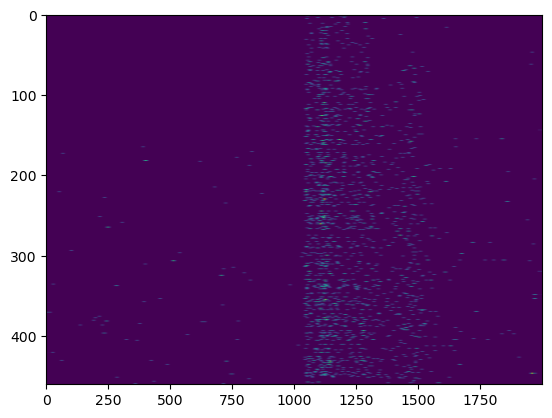

In [56]:
unit_sdf = getSDF(unit_spkMtx)
plt.imshow(unit_sdf,aspect='auto')

In [57]:
#Now look at trials. We want to look at trials at the target session we just chose. 
session_chosen = units.at[unit_chosen,'session']
session_chosen

'session_00'

In [58]:
session_trials = trials[trials['session']==session_chosen].reset_index(drop=True)
session_trials.shape

(461, 19)

In [ ]:
#Here we can see the target cooling temperature is 30. 
trials.iloc[0]

start_time                                                   -1.0
stop_time                                                     1.0
session                                                session_00
sess_name                                                 l220428
hemisphere                                                     LH
trialNum                                                        1
ref_stimID                                                     31
test_stimID                                                    31
pdOnTS_V4                  [17.01606973308833, 17.64115783074282]
pdOffTS_V4               [17.414674896787503, 18.148084397683075]
pdOnTS_PFC               [17.034974966131948, 17.660066265327984]
pdOffTS_PFC              [17.433582171384938, 18.166995428616605]
eyeH            [-12251, -12249, -12264, -12229, -12239, -1226...
eyeV            [-13998, -14013, -14018, -14005, -14016, -1401...
correct                                                         1
pypeRT    